In [40]:
# Getting our important imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

In [2]:
!pip install -U yellowbrick

     |████████████████████████████████| 266kB 3.4MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [3]:
import yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Mounting the csv file data. Please link this to your own path if you are not linking from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
path = '/content/drive/My Drive/Colab Notebooks/bhutan_samples.csv' # This is the google drive path to where my csv file is located, please place your path/relative path here
df = pd.read_csv(path)
df.head()

#Let's view the initial 10 values of the dataset to have an idea what we are looking at

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


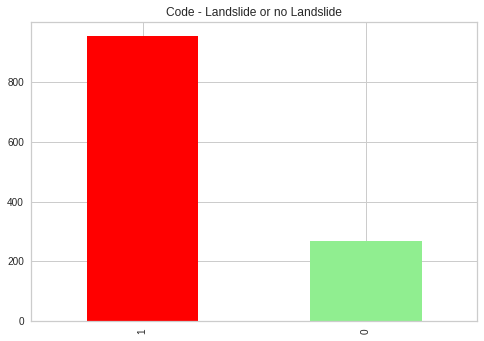

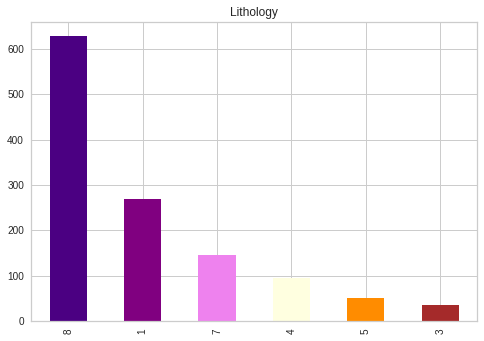

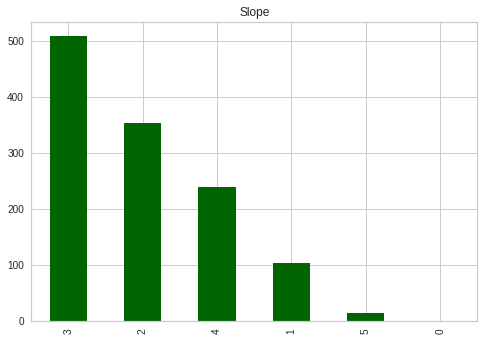

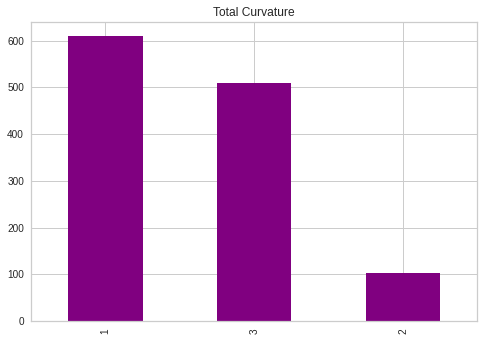

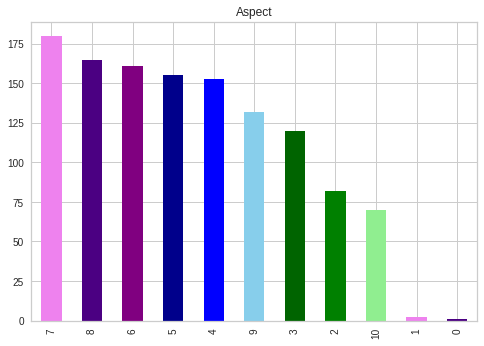

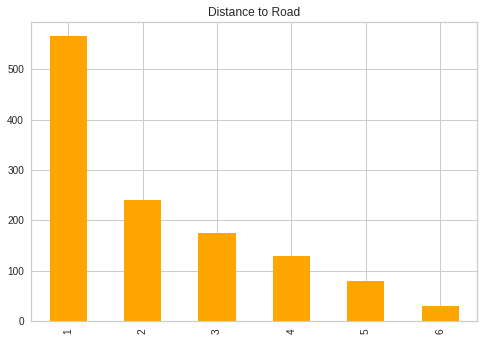

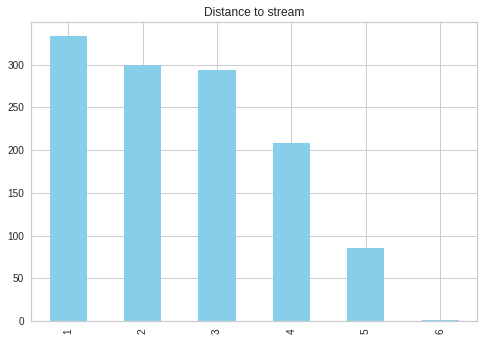

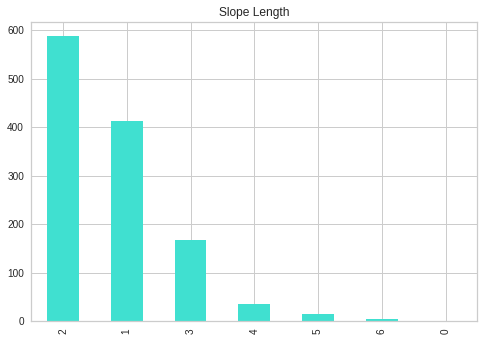

In [13]:
# Now, we would like to view the plots in terms of the quantity, how are the values quantized

data = df
fig, ax = plt.subplots()
landslidebar = data['Code'].value_counts().plot(ax=ax, kind='bar', color = ['red', 'lightgreen']).title.set_text('Code - Landslide or no Landslide')
fig, ax = plt.subplots()
data['Lithology'].value_counts().plot(ax=ax, kind='bar', color = ['indigo','purple','violet','lightyellow','darkorange','brown']).title.set_text('Lithology')
fig, ax = plt.subplots()
data['Slope'].value_counts().plot(ax=ax, kind='bar', color = 'darkgreen').title.set_text('Slope')
fig, ax = plt.subplots()
data['Total curvature'].value_counts().plot(ax=ax, kind='bar', color = 'purple').title.set_text('Total Curvature')
fig, ax = plt.subplots()
data['Aspect'].value_counts().plot(ax=ax, kind='bar', color = ['violet','indigo','purple','darkblue','blue','skyblue','darkgreen','green','lightgreen']).title.set_text('Aspect')
fig, ax = plt.subplots()
data['Distance to road'].value_counts().plot(ax=ax, kind='bar', color = 'orange').title.set_text('Distance to Road')
fig, ax = plt.subplots()
data['Distance to stream'].value_counts().plot(ax=ax, kind='bar', color = 'skyblue').title.set_text('Distance to stream')
fig, ax = plt.subplots()
data['Slope length'].value_counts().plot(ax=ax, kind='bar', color = 'turquoise').title.set_text('Slope Length')

In [16]:
# Now we want to conduct a chi-squared test. This is a statistical formula that helps us test whether the end result (Landslide) is dependent on the variables
#Initial Prep of data
df.rename(columns={'Total curvature':'Totalcurvature', 'Distance to road':'Distancetoroad','Distance to stream':'Distancetostream', 'Slope length':'Slopelength'}, inplace=True)
lit1 = df[(df.Code == 0) & (df.Lithology == 1)].sum().Lithology
lit12 = df[(df.Code == 1) & (df.Lithology == 1)].sum().Lithology
lit3 = df[(df.Code == 0) & (df.Lithology == 3)].sum().Lithology
lit32 = df[(df.Code == 1) & (df.Lithology == 3)].sum().Lithology
lit4 = df[(df.Code == 0) & (df.Lithology == 4)].sum().Lithology
lit42 = df[(df.Code == 1) & (df.Lithology == 4)].sum().Lithology
lit5 = df[(df.Code == 0) & (df.Lithology == 5)].sum().Lithology
lit52 = df[(df.Code == 1) & (df.Lithology == 5)].sum().Lithology
lit7 = df[(df.Code == 0) & (df.Lithology == 7)].sum().Lithology
lit72 = df[(df.Code == 1) & (df.Lithology == 7)].sum().Lithology
lit8 = df[(df.Code == 0) & (df.Lithology == 8)].sum().Lithology
lit82 = df[(df.Code == 1) & (df.Lithology == 8)].sum().Lithology
slo1 = df[(df.Code == 0) & (df.Slope == 1)].sum().Slope
slo12 = df[(df.Code == 1) & (df.Slope == 1)].sum().Slope
slo2 = df[(df.Code == 0) & (df.Slope == 2)].sum().Slope
slo22 = df[(df.Code == 1) & (df.Slope == 2)].sum().Slope
slo3 = df[(df.Code == 0) & (df.Slope == 3)].sum().Slope
slo32 = df[(df.Code == 1) & (df.Slope == 3)].sum().Slope
slo4 = df[(df.Code == 0) & (df.Slope == 4)].sum().Slope
slo42 = df[(df.Code == 1) & (df.Slope == 4)].sum().Slope
slo5 = df[(df.Code == 0) & (df.Slope == 5)].sum().Slope
slo52 = df[(df.Code == 1) & (df.Slope == 5)].sum().Slope
tc1 = df[(df.Code == 0) & (df.Totalcurvature == 1)].sum().Totalcurvature
tc12 = df[(df.Code == 1) & (df.Totalcurvature == 1)].sum().Totalcurvature
tc2 = df[(df.Code == 0) & (df.Totalcurvature == 2)].sum().Totalcurvature
tc22 = df[(df.Code == 1) & (df.Totalcurvature == 2)].sum().Totalcurvature
tc3 = df[(df.Code == 0) & (df.Totalcurvature == 3)].sum().Totalcurvature
tc32 = df[(df.Code == 1) & (df.Totalcurvature == 3)].sum().Totalcurvature
as1 = df[(df.Code == 0) & (df.Aspect == 1)].sum().Aspect
as12 = df[(df.Code == 1) & (df.Aspect == 1)].sum().Aspect
as2 = df[(df.Code == 0) & (df.Aspect == 2)].sum().Aspect
as22 = df[(df.Code == 1) & (df.Aspect == 2)].sum().Aspect
as3 = df[(df.Code == 0) & (df.Aspect == 3)].sum().Aspect
as32 = df[(df.Code == 1) & (df.Aspect == 3)].sum().Aspect
as4 = df[(df.Code == 0) & (df.Aspect == 4)].sum().Aspect
as42 = df[(df.Code == 1) & (df.Aspect == 4)].sum().Aspect
as5 = df[(df.Code == 0) & (df.Aspect == 5)].sum().Aspect
as52 = df[(df.Code == 1) & (df.Aspect == 5)].sum().Aspect
as6 = df[(df.Code == 0) & (df.Aspect == 6)].sum().Aspect
as62 = df[(df.Code == 1) & (df.Aspect == 6)].sum().Aspect
as7 = df[(df.Code == 0) & (df.Aspect == 7)].sum().Aspect
as72 = df[(df.Code == 1) & (df.Aspect == 7)].sum().Aspect
as8 = df[(df.Code == 0) & (df.Aspect == 8)].sum().Aspect
as82 = df[(df.Code == 1) & (df.Aspect == 8)].sum().Aspect
as9 = df[(df.Code == 0) & (df.Aspect == 9)].sum().Aspect
as92 = df[(df.Code == 1) & (df.Aspect == 9)].sum().Aspect
as10 = df[(df.Code == 0) & (df.Aspect == 10)].sum().Aspect
as102 = df[(df.Code == 1) & (df.Aspect == 10)].sum().Aspect
dtr1 = df[(df.Code == 0) & (df.Distancetoroad == 1)].sum().Distancetoroad
dtr12 = df[(df.Code == 1) & (df.Distancetoroad == 1)].sum().Distancetoroad
dtr2 = df[(df.Code == 0) & (df.Distancetoroad == 2)].sum().Distancetoroad
dtr22 = df[(df.Code == 1) & (df.Distancetoroad == 2)].sum().Distancetoroad
dtr3 = df[(df.Code == 0) & (df.Distancetoroad == 3)].sum().Distancetoroad
dtr32 = df[(df.Code == 1) & (df.Distancetoroad == 3)].sum().Distancetoroad
dtr4 = df[(df.Code == 0) & (df.Distancetoroad == 4)].sum().Distancetoroad
dtr42 = df[(df.Code == 1) & (df.Distancetoroad == 4)].sum().Distancetoroad
dtr5 = df[(df.Code == 0) & (df.Distancetoroad == 5)].sum().Distancetoroad
dtr52 = df[(df.Code == 1) & (df.Distancetoroad == 5)].sum().Distancetoroad
dtr6 = df[(df.Code == 0) & (df.Distancetoroad == 6)].sum().Distancetoroad
dtr62 = df[(df.Code == 1) & (df.Distancetoroad == 6)].sum().Distancetoroad
dts1 = df[(df.Code == 0) & (df.Distancetostream == 1)].sum().Distancetostream
dts12 = df[(df.Code == 1) & (df.Distancetostream == 1)].sum().Distancetostream
dts2 = df[(df.Code == 0) & (df.Distancetostream == 2)].sum().Distancetostream
dts22 = df[(df.Code == 1) & (df.Distancetostream == 2)].sum().Distancetostream
dts3 = df[(df.Code == 0) & (df.Distancetostream == 3)].sum().Distancetostream
dts32 = df[(df.Code == 1) & (df.Distancetostream == 3)].sum().Distancetostream
dts4 = df[(df.Code == 0) & (df.Distancetostream == 4)].sum().Distancetostream
dts42 = df[(df.Code == 1) & (df.Distancetostream == 4)].sum().Distancetostream
dts5 = df[(df.Code == 0) & (df.Distancetostream == 5)].sum().Distancetostream
dts52 = df[(df.Code == 1) & (df.Distancetostream == 5)].sum().Distancetostream
dts6 = df[(df.Code == 0) & (df.Distancetostream == 6)].sum().Distancetostream
dts62 = df[(df.Code == 1) & (df.Distancetostream == 6)].sum().Distancetostream
sl1 = df[(df.Code == 0) & (df.Slopelength == 1)].sum().Slopelength
sl12 = df[(df.Code == 1) & (df.Slopelength == 1)].sum().Slopelength
sl2 = df[(df.Code == 0) & (df.Slopelength == 2)].sum().Slopelength
sl22 = df[(df.Code == 1) & (df.Slopelength == 2)].sum().Slopelength
sl3 = df[(df.Code == 0) & (df.Slopelength == 3)].sum().Slopelength
sl32 = df[(df.Code == 1) & (df.Slopelength == 3)].sum().Slopelength
sl4 = df[(df.Code == 0) & (df.Slopelength == 4)].sum().Slopelength
sl42 = df[(df.Code == 1) & (df.Slopelength == 4)].sum().Slopelength
sl5 = df[(df.Code == 0) & (df.Slopelength == 5)].sum().Slopelength
sl52 = df[(df.Code == 1) & (df.Slopelength == 5)].sum().Slopelength
sl6 = df[(df.Code == 0) & (df.Slopelength == 6)].sum().Slopelength
sl62 = df[(df.Code == 1) & (df.Slopelength == 6)].sum().Slopelength
# Placing into a matrix form
# y-axis - Code
# x-axis - Lithology
chi_table_lit = [[lit1,lit3,lit4,lit5,lit7,lit8],
              [lit12,lit32,lit42,lit52,lit72,lit82]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Slope
chi_table_slo = [[slo1,slo2,slo3,slo4,slo5],
              [slo12,slo22,slo32,slo42,slo52]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Total Curvature
chi_table_tc = [[tc1,tc2,tc3],
              [tc12,tc22,tc32]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Aspect
chi_table_as = [[as1,as2,as3,as4,as5,as6,as7,as8,as9,as10],
              [as12,as22,as32,as42,as52,as62,as72,as82,as92,as102]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Distance to road
chi_table_dtr = [[dtr1,dtr2],
              [dtr12,dtr22]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Distance to stream
chi_table_dts = [[dts1,dts2,dts3,dts4,dts5,dts6],
              [dts12,dts22,dts32,dts42,dts52,dts62]]

# Placing into a matrix form
# y-axis - Code
# x-axis - Slope Length
chi_table_sl = [[sl1,sl2,sl3,sl4,sl5,sl6],
              [sl12,sl22,sl32,sl42,sl52,sl62]]

In [18]:
# Conducting test for Lithology
stat, p, dof, expected = chi2_contingency(chi_table_lit)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
 
# Conducting test for Slope
stat, p, dof, expected = chi2_contingency(chi_table_slo)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
  
# Conducting test for Total Curvature
stat, p, dof, expected = chi2_contingency(chi_table_tc)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
   
# Conducting test for Aspect
stat, p, dof, expected = chi2_contingency(chi_table_as)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
   
# Conducting test for Distance to Road
stat, p, dof, expected = chi2_contingency(chi_table_dtr)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

# Conducting test for Distance to Stream
stat, p, dof, expected = chi2_contingency(chi_table_dts)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

# Conducting test for Slope Length
stat, p, dof, expected = chi2_contingency(chi_table_sl)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=5
[[  54.90991759   22.12787724   77.03779483   52.24637681  207.96106849
  1027.71696505]
 [ 213.09008241   85.87212276  298.96220517  202.75362319  807.03893151
  3988.28303495]]
probability=0.950, critical=11.070, stat=413.499
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
dof=4
[[  22.27688651  151.65418895  326.44206774  205.63279857   14.99405823]
 [  81.72311349  556.34581105 1197.55793226  754.36720143   55.00594177]]
probability=0.950, critical=9.488, stat=8.950
Independent (fail to reject H0)
significance=0.050, p=0.062
Independent (fail to reject H0)
dof=2
[[ 129.4970111    43.80358668  324.69940222]
 [ 479.5029889   162.19641332 1202.30059778]]
probability=0.950, critical=5.991, stat=6.154
Dependent (reject H0)
significance=0.050, p=0.046
Dependent (reject H0)
dof=9
[[4.36913026e-01 3.58268681e+01 7.86443446e+01 1.33695386e+02
  1.69303797e+02 2.11028991e+02 2.75255206e+02 2.88362597e+02
  2.59526337e+02 1.52919559e+02]
 [1.56308697e+00 1.281731

In [19]:
# Now we have to set the dummy variables. Essentially this is similar to the one-hot encoding function, we want a binary value to tell us what the conditions are when the landslides happened
# Setting dummy variables
dummy_lit = pd.get_dummies(df['Lithology'])
dummy_alt = pd.get_dummies(df['Altitude'])
dummy_slo = pd.get_dummies(df['Slope'])
dummy_tc = pd.get_dummies(df['Totalcurvature'])
dummy_as = pd.get_dummies(df['Aspect'])
dummy_dtr = pd.get_dummies(df['Distancetoroad'])
dummy_dts = pd.get_dummies(df['Distancetostream'])
dummy_sl = pd.get_dummies(df['Slopelength'])
dummy_twi = pd.get_dummies(df['TWI'])
dummy_sti = pd.get_dummies(df['STI'])

In [20]:
# Placing all the dummy variables into a new dataframe df2
# Creating a new data frame
collated_data = [dummy_lit,dummy_alt,dummy_slo,dummy_tc,dummy_dtr,dummy_dts,dummy_sl,dummy_twi,dummy_sti]
df2 = pd.concat(collated_data, axis=1)
df2.head()

,1,3,4,5,7,8,1,2,3,4,5,6,0,1,2,3,4,5,1,2,3,1,2,3,4,5,6,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [21]:
# Adding the relevant title heads
dummy_lit = pd.get_dummies(df['Lithology'], prefix='Lit')
dummy_alt = pd.get_dummies(df['Altitude'], prefix='Alt')
dummy_slo = pd.get_dummies(df['Slope'], prefix='Slope')
dummy_tc = pd.get_dummies(df['Totalcurvature'], prefix='TC')
dummy_as = pd.get_dummies(df['Aspect'], prefix='Aspect')
dummy_dtr = pd.get_dummies(df['Distancetoroad'], prefix='DTR')
dummy_dts = pd.get_dummies(df['Distancetostream'], prefix='DTS')
dummy_sl = pd.get_dummies(df['Slopelength'], prefix='SL')
dummy_twi = pd.get_dummies(df['TWI'], prefix='TWI')
dummy_sti = pd.get_dummies(df['STI'], prefix='STI')
collated_data = [dummy_lit,dummy_alt,dummy_slo,dummy_tc,dummy_dtr,dummy_dts,dummy_sl,dummy_twi,dummy_sti]
df2 = pd.concat(collated_data, axis=1)
df2.head()

,Lit_1,Lit_3,Lit_4,Lit_5,Lit_7,Lit_8,Alt_1,Alt_2,Alt_3,Alt_4,Alt_5,Alt_6,Slope_0,Slope_1,Slope_2,Slope_3,Slope_4,Slope_5,TC_1,TC_2,TC_3,DTR_1,DTR_2,DTR_3,DTR_4,DTR_5,DTR_6,DTS_1,DTS_2,DTS_3,DTS_4,DTS_5,DTS_6,SL_0,SL_1,SL_2,SL_3,SL_4,SL_5,SL_6,TWI_0,TWI_1,TWI_2,TWI_3,TWI_4,TWI_5,TWI_6,STI_0,STI_1,STI_2,STI_3,STI_4
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [22]:
# Now we want to retrieve back the 'results', which is code. And also place a new variable X,y for df2 for training later
X = df2
y = df.iloc[:,2]
print(X)
print(y)

      Lit_1  Lit_3  Lit_4  Lit_5  Lit_7  ...  STI_0  STI_1  STI_2  STI_3  STI_4
0         1      0      0      0      0  ...      0      1      0      0      0
1         1      0      0      0      0  ...      0      1      0      0      0
2         1      0      0      0      0  ...      1      0      0      0      0
3         1      0      0      0      0  ...      1      0      0      0      0
4         1      0      0      0      0  ...      1      0      0      0      0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
1216      0      0      0      1      0  ...      0      1      0      0      0
1217      0      0      0      1      0  ...      1      0      0      0      0
1218      0      0      0      1      0  ...      1      0      0      0      0
1219      0      0      0      1      0  ...      1      0      0      0      0
1220      0      0      0      1      0  ...      1      0      0      0      0

[1221 rows x 52 columns]
0       1
1   

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Setting the training size at 80% of the entire set, and test at 20%. This is just a conventional value. You may set your own

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        58
           1       0.93      0.91      0.92       187

    accuracy                           0.88       245
   macro avg       0.83      0.84      0.83       245
weighted avg       0.88      0.88      0.88       245

[[ 45  13]
 [ 17 170]]


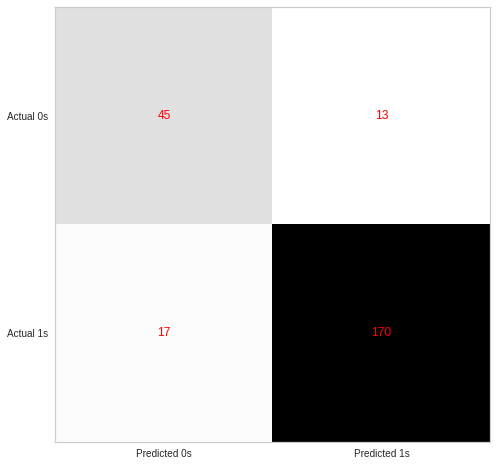

In [27]:
# Sklearn, exploring decision tree classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))
cm= metrics.confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9144385026737968
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        58
           1       0.93      0.91      0.92       187

    accuracy                           0.88       245
   macro avg       0.83      0.84      0.83       245
weighted avg       0.88      0.88      0.88       245

[[ 42  16]
 [ 16 171]]


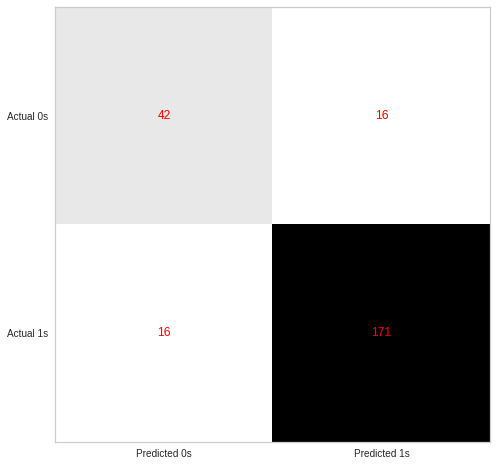

In [29]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
print(logisticRegr)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
score = print(f1_score(y_test, predictions))
cm = metrics.confusion_matrix(y_test, predictions)
print(metrics.classification_report(y_test, y_predict))
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

0.9272237196765498
None
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        58
           1       0.93      0.92      0.93       187

    accuracy                           0.89       245
   macro avg       0.84      0.86      0.85       245
weighted avg       0.89      0.89      0.89       245

[[ 46  12]
 [ 15 172]]


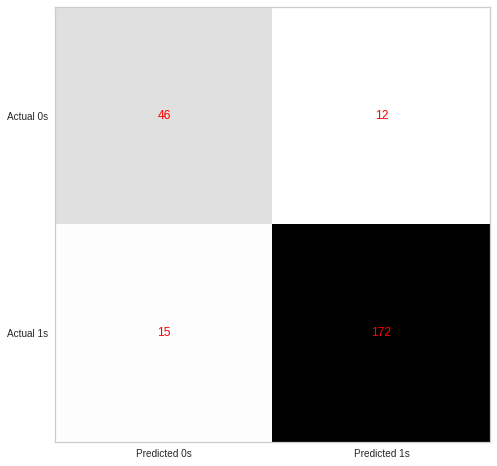

In [30]:
Forestregressor = RandomForestClassifier(n_estimators=20, random_state=0)
Forestregressor.fit(X_train, y_train)
Fpredictions = Forestregressor.predict(X_test)
score = print(f1_score(y_test, Fpredictions))
print(score)
cm = metrics.confusion_matrix(y_test, Fpredictions)
print(metrics.classification_report(y_test, Fpredictions))
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

0.9222520107238605
None
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        58
           1       0.92      0.92      0.92       187

    accuracy                           0.88       245
   macro avg       0.84      0.84      0.84       245
weighted avg       0.88      0.88      0.88       245

[[ 44  14]
 [ 15 172]]


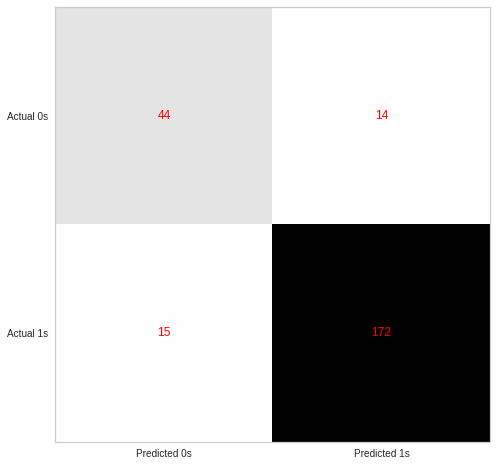

In [31]:
regressor = GradientBoostingClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
score = print(f1_score(y_test, predictions))
print(score)
cm = metrics.confusion_matrix(y_test, predictions)
print(metrics.classification_report(y_test, predictions))
print(cm)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


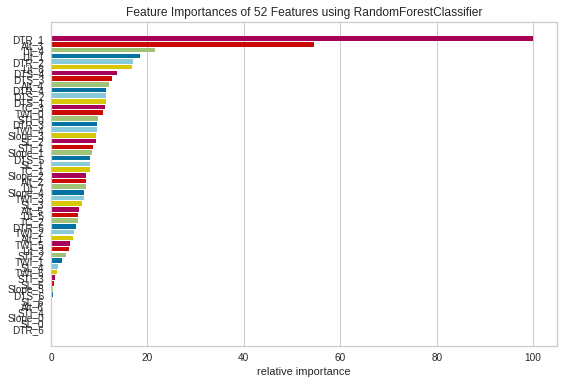

In [32]:
# Now we want to fit into a graph to see which variable impacts the results(landlsides) greatly
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(Forestregressor)
viz.fit(X, y)
viz.show()

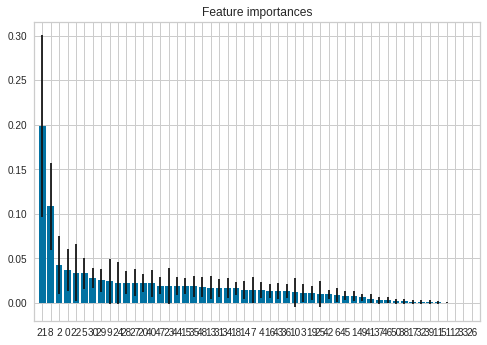

In [67]:
# As the data may be too much, let's reduce it a little
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = Forestregressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in Forestregressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()